**NAME: SHRAVYA SHASHIDHAR  
USERNAME:sshashid@usc.edu  
USCID: 2763825542**

In [175]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, RocCurveDisplay, accuracy_score, hamming_loss
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from IPython.display import display
from PIL import Image
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from scipy.special import softmax
from sklearn.cluster import SpectralClustering
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

1.(a)Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [6]:
data=pd.read_csv("../data/wdbc.data")
data.columns = ['ID', 'class'] + [f'Attr{i+1}' for i in range(30)]
data

,ID,class,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,...,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
data.replace({'M': 1, 'B': 0}, inplace=True)
data

,ID,class,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,...,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**(1)(b)(i)Supervised Learning Once**

In [61]:
train,test=train_test_split(data,test_size=0.2,stratify=data['class'],random_state=42)
print("\nData class distribution:\n", data['class'].value_counts())
print("Training class distribution:\n", train['class'].value_counts())
print("\nTest class distribution:\n", test['class'].value_counts())


Data class distribution:
 class
0    357
1    211
Name: count, dtype: int64
Training class distribution:
 class
0    285
1    169
Name: count, dtype: int64

Test class distribution:
 class
0    72
1    42
Name: count, dtype: int64


In [63]:
y_train = train['class']
y_test= test['class']

In [64]:
train_to_normalise=train.drop(columns=['ID', 'class'])
scaler = StandardScaler()
train= scaler.fit_transform(train_to_normalise)
test_to_normalise=test.drop(columns=['ID', 'class'])
test = scaler.transform(test_to_normalise)

In [74]:
model=LinearSVC(penalty='l1', dual=False)
param_grid={'C':  np.logspace(-5, 5, 20)}
SVM_model=GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
SVM_model.fit(train, y_train)
print(SVM_model.best_params_)
best_model=SVM_model.best_estimator_
y_train_pred=best_model.predict(train)
y_test_pred=best_model.predict(test)

{'C': 0.04832930238571752}


In [75]:
CM_train=confusion_matrix(y_train, y_train_pred)
CM_train

array([[283,   2],
       [  8, 161]], dtype=int64)

The confusion Matrix for training data is shown above

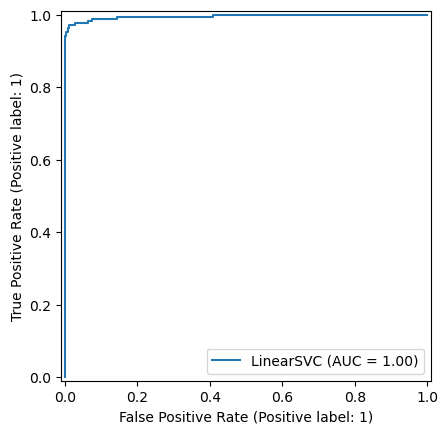

In [76]:
RocCurveDisplay.from_estimator(best_model, train, y_train)

ROC plot for training data is shown above

In [77]:
CM_test=confusion_matrix(y_test, y_test_pred)
CM_test

array([[72,  0],
       [ 1, 41]], dtype=int64)

Confusion Matrix for test data is shown above

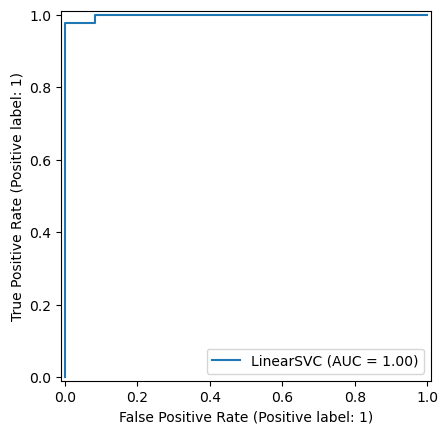

In [78]:
RocCurveDisplay.from_estimator(best_model, test, y_test)

ROC plot for test data is shown above

**Supervised Learning Thirty times**

In [81]:
train_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC': [] }
test_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC': [] }
model=LinearSVC(penalty='l1', dual=False)
param_grid={'C': np.logspace(-5, 5, 20)}

for i in range(30):
    train,test=train_test_split(data,test_size=0.2,stratify=data['class'],random_state=i)
    y_train = train['class']
    y_test= test['class']
    train_to_normalise=train.drop(columns=['ID', 'class'])
    scaler = StandardScaler()
    train= scaler.fit_transform(train_to_normalise)
    test_to_normalise=test.drop(columns=['ID', 'class'])
    test = scaler.transform(test_to_normalise)
    SVM_model=GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    SVM_model.fit(train, y_train)
    print(SVM_model.best_params_)
    best_model=SVM_model.best_estimator_
    y_train_pred=best_model.predict(train)
    y_test_pred=best_model.predict(test)
    
    SVM_model=GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    SVM_model.fit(train, y_train)
    print(str(i),"-",SVM_model.best_params_)
    best_model=SVM_model.best_estimator_
    y_train_pred=best_model.predict(train)
    y_test_pred=best_model.predict(test)
    train_metrics['Accuracy'].append(accuracy_score(y_train, y_train_pred))
    train_metrics['Precision'].append(precision_score(y_train, y_train_pred))
    train_metrics['Recall'].append(recall_score(y_train, y_train_pred))
    train_metrics['F1-score'].append(f1_score(y_train, y_train_pred))
    train_metrics['AUC'].append(roc_auc_score(y_train, best_model.decision_function(train)))

    test_metrics['Accuracy'].append(accuracy_score(y_test, y_test_pred))
    test_metrics['Precision'].append(precision_score(y_test, y_test_pred))
    test_metrics['Recall'].append(recall_score(y_test, y_test_pred))
    test_metrics['F1-score'].append(f1_score(y_test, y_test_pred))
    test_metrics['AUC'].append(roc_auc_score(y_test, best_model.decision_function(test)))

    


0 - {'C': 0.04832930238571752}
1 - {'C': 0.04832930238571752}
2 - {'C': 0.5455594781168515}
3 - {'C': 0.04832930238571752}
4 - {'C': 0.5455594781168515}
5 - {'C': 0.1623776739188721}
6 - {'C': 0.5455594781168515}
7 - {'C': 0.1623776739188721}
8 - {'C': 0.04832930238571752}
9 - {'C': 0.1623776739188721}
10 - {'C': 0.5455594781168515}
11 - {'C': 0.1623776739188721}
12 - {'C': 0.1623776739188721}
13 - {'C': 0.1623776739188721}
14 - {'C': 0.04832930238571752}
15 - {'C': 0.04832930238571752}
16 - {'C': 0.5455594781168515}
17 - {'C': 0.5455594781168515}
18 - {'C': 0.5455594781168515}
19 - {'C': 0.1623776739188721}
20 - {'C': 0.04832930238571752}
21 - {'C': 0.1623776739188721}
22 - {'C': 0.04832930238571752}
23 - {'C': 0.1623776739188721}
24 - {'C': 0.5455594781168515}
25 - {'C': 0.1623776739188721}
26 - {'C': 0.1623776739188721}
27 - {'C': 0.5455594781168515}
28 - {'C': 0.04832930238571752}
29 - {'C': 0.04832930238571752}


In [82]:
pd.DataFrame(train_metrics)

,Accuracy,Precision,Recall,F1-score,AUC
0,0.984581,0.993902,0.964497,0.978979,0.997301
1,0.980176,0.993827,0.952663,0.972810,0.996740
2,0.988987,0.993976,0.976331,0.985075,0.998318
3,0.977974,0.981818,0.958580,0.970060,0.994789
4,0.991189,0.988166,0.988166,0.988166,0.999606
5,0.988987,0.993976,0.976331,0.985075,0.996990
6,0.984581,0.987952,0.970414,0.979104,0.997093
7,0.986784,0.993939,0.970414,0.982036,0.996761
8,0.975771,0.981707,0.952663,0.966967,0.997446
9,0.991189,1.000000,0.976331,0.988024,0.997135


In [83]:
pd.DataFrame(test_metrics)

,Accuracy,Precision,Recall,F1-score,AUC
0,0.964912,0.952381,0.952381,0.952381,0.983466
1,0.964912,0.975000,0.928571,0.951220,0.985450
2,0.964912,0.931818,0.976190,0.953488,0.995040
3,0.973684,1.000000,0.928571,0.962963,0.985450
4,0.964912,0.975000,0.928571,0.951220,0.963294
5,0.982456,1.000000,0.952381,0.975610,0.995701
6,0.991228,0.976744,1.000000,0.988235,0.999669
7,0.982456,0.976190,0.976190,0.976190,0.999008
8,0.991228,1.000000,0.976190,0.987952,0.990741
9,0.982456,0.976190,0.976190,0.976190,0.998677


In [84]:
average_metrics = {key: np.mean(value) for key, value in train_metrics.items()}
print("Average Metrics over 30 Runs for training data:")
for metric, avg_value in average_metrics.items():
    print(f"{metric}: {avg_value:.4f}")

Average Metrics over 30 Runs for training data:
Accuracy: 0.9866
Precision: 0.9922
Recall: 0.9716
F1-score: 0.9817
AUC: 0.9974


In [85]:
average_metrics = {key: np.mean(value) for key, value in test_metrics.items()}
print("Average Metrics over 30 Runs for test data:")
for metric, avg_value in average_metrics.items():
    print(f"{metric}: {avg_value:.4f}")

Average Metrics over 30 Runs for test data:
Accuracy: 0.9690
Precision: 0.9693
Recall: 0.9468
F1-score: 0.9574
AUC: 0.9919


**(1)(b)(ii)(A) and (B). Semi-Supervised Learning/ Self-training:(Once)**

In [107]:
train,test=train_test_split(data,test_size=0.2,stratify=data['class'],random_state=42)
y_train = train['class']
y_test= test['class']
train_to_normalise=train.drop(columns=['ID', 'class'])
scaler = StandardScaler()
train= scaler.fit_transform(train_to_normalise)
test_to_normalise=test.drop(columns=['ID', 'class'])
test = scaler.transform(test_to_normalise)
train_df= pd.DataFrame(train)
train_df['class'] = y_train.values

labeled_data= []
unlabeled_data=[]
class_one=train_df[train_df['class'] == 0]
class_two=train_df[train_df['class'] == 1]
class_one_part=class_one.sample(frac=0.5, random_state=42)
class_one_remaining = class_one.drop(class_one_part.index)
class_two_part=class_two.sample(frac=0.5, random_state=42)
class_two_remaining = class_two.drop(class_two_part.index)
labeled_data.append(class_one_part)
labeled_data.append(class_two_part)
labeled_data = pd.concat(labeled_data)
X_labeled = labeled_data.drop(columns='class')
y_labeled = labeled_data['class'].values

unlabeled_data.append(class_one_remaining)
unlabeled_data.append(class_two_remaining)
unlabeled_data = pd.concat(unlabeled_data)
X_unlabeled = unlabeled_data.drop(columns='class')
y_unlabeled = unlabeled_data['class'].values

while len(X_unlabeled) > 0:
    model=LinearSVC(penalty='l1', dual=False)
    param_grid={'C':  np.logspace(-5, 5, 20)}
    SVM_model=GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    SVM_model.fit(X_labeled, y_labeled)
    best_model = SVM_model.best_estimator_
    
    decision_scores = best_model.decision_function(X_unlabeled)
    farthest_idx = np.argmax(np.abs(decision_scores))
    most_confident_sample = X_unlabeled.iloc[farthest_idx].values.reshape(1, -1)
    pseudo_label = best_model.predict(most_confident_sample)
    X_labeled = np.vstack([X_labeled,most_confident_sample])
    y_labeled = np.append(y_labeled, pseudo_label)

    X_unlabeled = X_unlabeled.drop(X_unlabeled.index[farthest_idx])

C=SVM_model.best_params_['C']
final_model = LinearSVC(penalty='l1', dual=False, C=C, max_iter=10000)
final_model.fit(X_labeled, y_labeled)
y_train_pred = final_model.predict(train)
y_test_pred = final_model.predict(test)



In [108]:
CM_train=confusion_matrix(y_train, y_train_pred)
CM_train

array([[281,   4],
       [  5, 164]], dtype=int64)

Confusion Matrix for training data is shown above

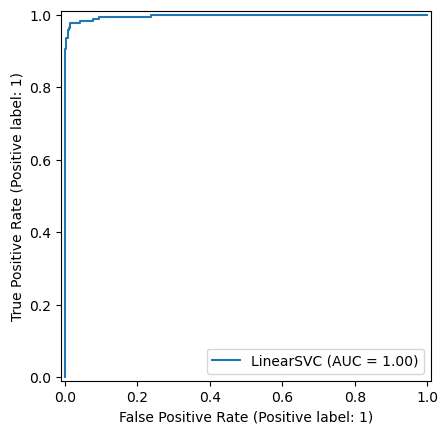

In [109]:
RocCurveDisplay.from_estimator(final_model, train, y_train)

ROC for training data is shown above

In [110]:
CM_test=confusion_matrix(y_test, y_test_pred)
CM_test

array([[71,  1],
       [ 1, 41]], dtype=int64)

Confusion Matrix for test data is shown above

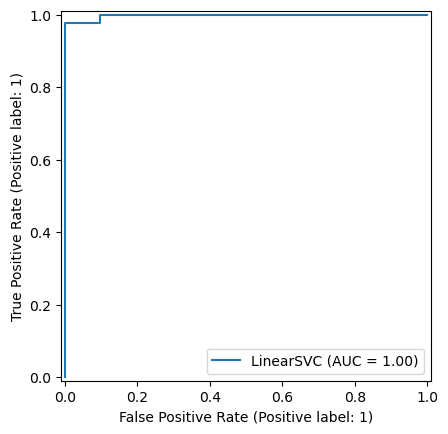

In [111]:
RocCurveDisplay.from_estimator(best_model, test, y_test)

ROC for test data is shown above

**(1)(b)(ii)(A) and (B)Semi-Supervised Learning/ Self-training:(30 times)**

In [112]:
train_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC': [] }
test_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC': [] }
model=LinearSVC(penalty='l1', dual=False)
param_grid={'C': np.logspace(-5, 5, 20)}

for i in range(30):
    train,test=train_test_split(data,test_size=0.2,stratify=data['class'],random_state=i)
    y_train = train['class']
    y_test= test['class']
    train_to_normalise=train.drop(columns=['ID', 'class'])
    scaler = StandardScaler()
    train= scaler.fit_transform(train_to_normalise)
    test_to_normalise=test.drop(columns=['ID', 'class'])
    test = scaler.transform(test_to_normalise)
    train_df= pd.DataFrame(train)
    train_df['class'] = y_train.values
    
    labeled_data= []
    unlabeled_data=[]
    class_one=train_df[train_df['class'] == 0]
    class_two=train_df[train_df['class'] == 1]
    class_one_part=class_one.sample(frac=0.5, random_state=i)
    class_one_remaining = class_one.drop(class_one_part.index)
    class_two_part=class_two.sample(frac=0.5, random_state=42)
    class_two_remaining = class_two.drop(class_two_part.index)
    labeled_data.append(class_one_part)
    labeled_data.append(class_two_part)
    labeled_data = pd.concat(labeled_data)
    X_labeled = labeled_data.drop(columns='class')
    y_labeled = labeled_data['class'].values

    unlabeled_data.append(class_one_remaining)
    unlabeled_data.append(class_two_remaining)
    unlabeled_data = pd.concat(unlabeled_data)
    X_unlabeled = unlabeled_data.drop(columns='class')
    y_unlabeled = unlabeled_data['class'].values
    
    while len(X_unlabeled) > 0:
        model=LinearSVC(penalty='l1', dual=False)
        param_grid={'C':  np.logspace(-5, 5, 20)}
        SVM_model=GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        SVM_model.fit(X_labeled, y_labeled)
        best_model = SVM_model.best_estimator_
        
        decision_scores = best_model.decision_function(X_unlabeled)
        farthest_idx = np.argmax(np.abs(decision_scores))
        most_confident_sample = X_unlabeled.iloc[farthest_idx].values.reshape(1, -1)
        pseudo_label = best_model.predict(most_confident_sample)
        X_labeled = np.vstack([X_labeled,most_confident_sample])
        y_labeled = np.append(y_labeled, pseudo_label)
    
        X_unlabeled = X_unlabeled.drop(X_unlabeled.index[farthest_idx])
    
    C=SVM_model.best_params_['C']
    final_model = LinearSVC(penalty='l1', dual=False, C=C, max_iter=10000)
    final_model.fit(X_labeled, y_labeled)
    y_train_pred = final_model.predict(train)
    y_test_pred = final_model.predict(test)

    train_metrics['Accuracy'].append(accuracy_score(y_train, y_train_pred))
    train_metrics['Precision'].append(precision_score(y_train, y_train_pred))
    train_metrics['Recall'].append(recall_score(y_train, y_train_pred))
    train_metrics['F1-score'].append(f1_score(y_train, y_train_pred))
    train_metrics['AUC'].append(roc_auc_score(y_train, final_model.decision_function(train)))

    test_metrics['Accuracy'].append(accuracy_score(y_test, y_test_pred))
    test_metrics['Precision'].append(precision_score(y_test, y_test_pred))
    test_metrics['Recall'].append(recall_score(y_test, y_test_pred))
    test_metrics['F1-score'].append(f1_score(y_test, y_test_pred))
    test_metrics['AUC'].append(roc_auc_score(y_test, final_model.decision_function(test)))


In [113]:
pd.DataFrame(train_metrics)

,Accuracy,Precision,Recall,F1-score,AUC
0,0.975771,0.993750,0.940828,0.966565,0.997301
1,0.980176,1.000000,0.946746,0.972644,0.996574
2,0.973568,0.981595,0.946746,0.963855,0.994519
3,0.975771,0.981707,0.952663,0.966967,0.995495
4,0.984581,0.987952,0.970414,0.979104,0.998983
5,0.977974,0.987730,0.952663,0.969880,0.995889
6,0.964758,1.000000,0.905325,0.950311,0.992962
7,0.980176,0.981928,0.964497,0.973134,0.988602
8,0.966960,0.993590,0.917160,0.953846,0.994228
9,0.969163,0.969697,0.946746,0.958084,0.994436


In [114]:
pd.DataFrame(test_metrics)

,Accuracy,Precision,Recall,F1-score,AUC
0,0.973684,1.000000,0.928571,0.962963,0.979497
1,0.956140,0.974359,0.904762,0.938272,0.984458
2,0.964912,0.975000,0.928571,0.951220,0.996693
3,0.973684,1.000000,0.928571,0.962963,0.996032
4,0.964912,0.975000,0.928571,0.951220,0.967262
5,0.947368,0.973684,0.880952,0.925000,0.992725
6,0.991228,1.000000,0.976190,0.987952,1.000000
7,0.973684,1.000000,0.928571,0.962963,0.998677
8,0.973684,1.000000,0.928571,0.962963,0.987434
9,0.964912,0.975000,0.928571,0.951220,0.998677


In [115]:
average_metrics = {key: np.mean(value) for key, value in train_metrics.items()}
print("Average Metrics over 30 Runs for training data:")
for metric, avg_value in average_metrics.items():
    print(f"{metric}: {avg_value:.4f}")

Average Metrics over 30 Runs for training data:
Accuracy: 0.9769
Precision: 0.9867
Recall: 0.9509
F1-score: 0.9683
AUC: 0.9951


In [116]:
average_metrics = {key: np.mean(value) for key, value in test_metrics.items()}
print("Average Metrics over 30 Runs for test data:")
for metric, avg_value in average_metrics.items():
    print(f"{metric}: {avg_value:.4f}")

Average Metrics over 30 Runs for test data:
Accuracy: 0.9629
Precision: 0.9694
Recall: 0.9294
F1-score: 0.9485
AUC: 0.9918


**(1)(b)(iii). Unsupervised Learning:**

(A) Setting the init value. This will internally run it 10 times and return the best one and prevent local minima

(B)&(C)

[[275  10]
 [ 32 137]]


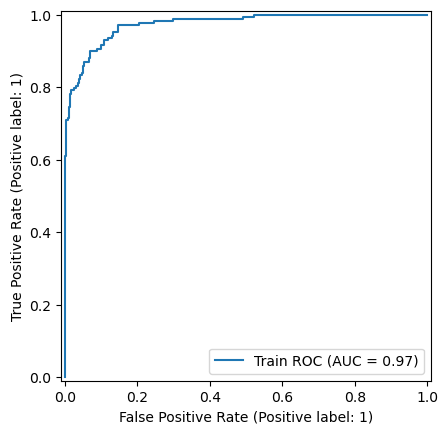

[[69  3]
 [ 5 37]]


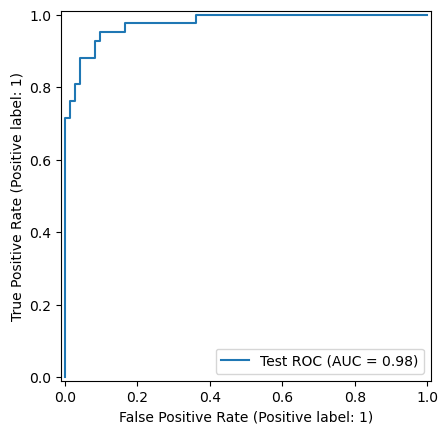

In [133]:
train_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC': [] }
test_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC': [] }
for i in range(30):
    train, test = train_test_split(data, test_size=0.2, stratify=data['class'], random_state=i)
    y_train = train['class']
    y_test= test['class']
    train_to_normalise=train.drop(columns=['ID', 'class'])
    scaler = StandardScaler()
    train= scaler.fit_transform(train_to_normalise)
    test_to_normalise=test.drop(columns=['ID', 'class'])
    test = scaler.transform(test_to_normalise)
    train_df= pd.DataFrame(train)
    train_df['class'] = y_train.values

    kmeans = KMeans(n_clusters=2, init='random', n_init=10, random_state=i)
    kmeans.fit(train)
    cluster_centers = kmeans.cluster_centers_
    train_clusters = kmeans.predict(train)
    test_clusters = kmeans.predict(test)

    cluster_labels = np.zeros(2)
    for cluster_id in range(2):
        dists = np.linalg.norm(train - cluster_centers[cluster_id], axis=1)
        closest_indices = np.argsort(dists)[:30]
        majority_label = mode(y_train.iloc[closest_indices], keepdims=True)[0]
        cluster_labels[cluster_id] = majority_label
    y_train_pred = cluster_labels[train_clusters.astype(int)]
    y_test_pred= cluster_labels[test_clusters.astype(int)]

    train_dists = np.array([
    np.linalg.norm(train - center, axis=1)
    for center in kmeans.cluster_centers_
    ])
    train_probs = softmax(-train_dists, axis=0).T

    train_class1_probs = np.zeros(train_probs.shape[0])
    for idx in range(2):
        train_class1_probs += train_probs[:, idx] * (cluster_labels[idx] == 1)

    test_dists = np.array([
    np.linalg.norm(test - center, axis=1)
    for center in kmeans.cluster_centers_
    ])
    test_probs = softmax(-test_dists, axis=0).T
    
    test_class1_probs = np.zeros(test_probs.shape[0])
    for idx in range(2):
        test_class1_probs += test_probs[:, idx] * (cluster_labels[idx] == 1)

    auc_train = roc_auc_score(y_train, train_class1_probs)
    auc_test = roc_auc_score(y_test, test_class1_probs)
    
    train_metrics['Accuracy'].append(accuracy_score(y_train, y_train_pred))
    train_metrics['Precision'].append(precision_score(y_train, y_train_pred))
    train_metrics['Recall'].append(recall_score(y_train, y_train_pred))
    train_metrics['F1-score'].append(f1_score(y_train, y_train_pred))
    train_metrics['AUC'].append(auc_train)


    test_metrics['Accuracy'].append(accuracy_score(y_test, y_test_pred))
    test_metrics['Precision'].append(precision_score(y_test, y_test_pred))
    test_metrics['Recall'].append(recall_score(y_test, y_test_pred))
    test_metrics['F1-score'].append(f1_score(y_test, y_test_pred))
    test_metrics['AUC'].append(auc_test)

    if i == 10:
        CM_train = confusion_matrix(y_train, y_train_pred)
        print(CM_train)
        RocCurveDisplay.from_predictions(y_train, train_class1_probs, name='Train ROC')
        plt.show()
        CM_test = confusion_matrix(y_test, y_test_pred)
        print(CM_test)
        RocCurveDisplay.from_predictions(y_test, test_class1_probs, name='Test ROC')
        plt.show()
        
        


The above output includes i)Confusion Matrix for training data ii) ROC for training data iii)Confusion Matrix for testing data iv) ROC for testing data

In [134]:
average_metrics = {key: np.mean(value) for key, value in train_metrics.items()}
print("Average Metrics over 30 Runs for training data:")
for metric, avg_value in average_metrics.items():
    print(f"{metric}: {avg_value:.4f}")

Average Metrics over 30 Runs for training data:
Accuracy: 0.9101
Precision: 0.9228
Recall: 0.8280
F1-score: 0.8727
AUC: 0.9747


In [137]:
average_metrics = {key: np.mean(value) for key, value in test_metrics.items()}
print("Average Metrics over 30 Runs for testing data:")
for metric, avg_value in average_metrics.items():
    print(f"{metric}: {avg_value:.4f}")

Average Metrics over 30 Runs for testing data:
Accuracy: 0.9053
Precision: 0.9083
Recall: 0.8270
F1-score: 0.8652
AUC: 0.9701


**(1)(b)iv. Spectral Clustering**

[[285   0]
 [167   2]]


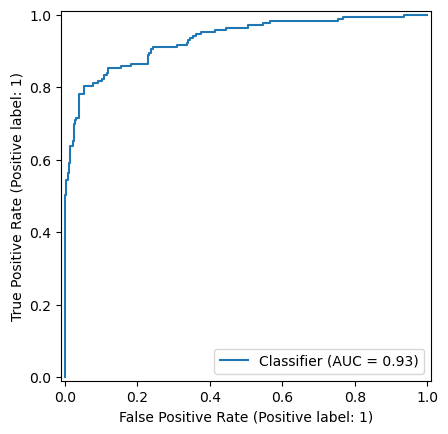

[[72  0]
 [42  0]]


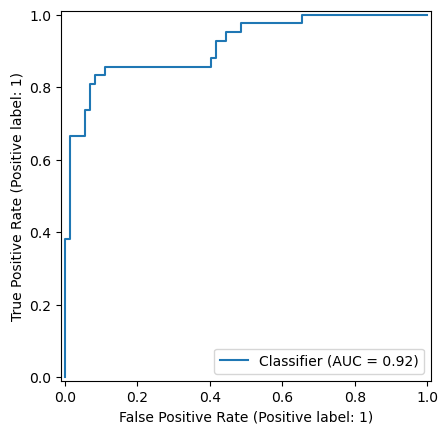

In [191]:
train_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC': [] }
test_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC': [] }

for i in range(30):
    train, test = train_test_split(data, test_size=0.2, stratify=data['class'], random_state=i)
    y_train = train['class']
    y_test= test['class']
    train_to_normalise=train.drop(columns=['ID', 'class'])
    scaler = StandardScaler()
    train= scaler.fit_transform(train_to_normalise)
    test_to_normalise=test.drop(columns=['ID', 'class'])
    test = scaler.transform(test_to_normalise)
    train_df= pd.DataFrame(train)
    train_df['class'] = y_train.values
    spectral = SpectralClustering(n_clusters=2, affinity='rbf',gamma=0.1, assign_labels='kmeans',n_init=20, random_state=i)
    train_clusters = spectral.fit_predict(train)
    test_clusters = spectral.fit_predict(test)

    cluster_labels = np.zeros(2)
    for cluster_id in range(2):
        indices = np.where(train_clusters == cluster_id)[0]
        majority_label = mode(y_train.iloc[indices], keepdims=False).mode
        cluster_labels[cluster_id] = majority_label
    
    y_train_pseudo = cluster_labels[train_clusters.astype(int)]
    clf = LogisticRegression()
    clf.fit(train, y_train_pseudo)
    
    y_train_pred = clf.predict(train)
    y_train_probs = clf.predict_proba(train)[:, 1]

    y_test_pred = clf.predict(test)
    y_test_probs = clf.predict_proba(test)[:, 1]

    train_metrics['Accuracy'].append(accuracy_score(y_train, y_train_pred))
    train_metrics['Precision'].append(precision_score(y_train, y_train_pred))
    train_metrics['Recall'].append(recall_score(y_train, y_train_pred))
    train_metrics['F1-score'].append(f1_score(y_train, y_train_pred))
    train_metrics['AUC'].append(roc_auc_score(y_train, y_train_probs))


    test_metrics['Accuracy'].append(accuracy_score(y_test, y_test_pred))
    test_metrics['Precision'].append(precision_score(y_test, y_test_pred))
    test_metrics['Recall'].append(recall_score(y_test, y_test_pred))
    test_metrics['F1-score'].append(f1_score(y_test, y_test_pred))
    test_metrics['AUC'].append(roc_auc_score(y_test, y_test_probs))

    if i == 10:
        CM_train = confusion_matrix(y_train, y_train_pred)
        print(CM_train)
        RocCurveDisplay.from_predictions(y_train, y_train_probs)
        plt.show()
        CM_test = confusion_matrix(y_test, y_test_pred)
        print(CM_test)
        RocCurveDisplay.from_predictions(y_test, y_test_probs)
        plt.show()

The above output includes (i) Confusion Matrix for training data (ii) ROC for training data (iii) Confusion Matrix for test data (iv) ROC for test data

In [192]:
average_metrics = {key: np.mean(value) for key, value in train_metrics.items()}
print("Average Metrics over 30 Runs for training data:")
for metric, avg_value in average_metrics.items():
    print(f"{metric}: {avg_value:.4f}")

Average Metrics over 30 Runs for training data:
Accuracy: 0.6814
Precision: 0.9997
Recall: 0.1444
F1-score: 0.1890
AUC: 0.9242


In [193]:
average_metrics = {key: np.mean(value) for key, value in test_metrics.items()}
print("Average Metrics over 30 Runs for testing data:")
for metric, avg_value in average_metrics.items():
    print(f"{metric}: {avg_value:.4f}")

Average Metrics over 30 Runs for testing data:
Accuracy: 0.6816
Precision: 0.2333
Recall: 0.1357
F1-score: 0.1711
AUC: 0.9305


**(1)(b)(v)The performance of supervised is almost similar to semi-supervised learning. Unsupervised learning does underperform compared to the two**

**2. Active Learning Using Support Vector Machines**

(a)

In [195]:
bank_data=pd.read_csv("../data/data_banknote_authentication.txt",header=None)
bank_data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [206]:
x = bank_data.iloc[:, :-1]
y = bank_data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=472/1372, random_state=42, shuffle = True)

In [207]:
x_train

,0,1,2,3
855,-1.8782,-6.58650,4.84860,-0.021566
622,5.0429,-0.52974,0.50439,1.106000
969,-2.1786,-6.44790,6.03440,-0.207770
947,-1.6820,-6.81210,7.13980,1.332300
1199,-2.9138,-9.47110,9.76680,-0.602160
...,...,...,...,...
1095,1.1640,3.91300,-4.55440,-3.867200
1130,-2.2918,-7.25700,7.95970,0.921100
1294,-7.0364,9.29310,0.16594,-4.539600
860,-3.4605,2.69010,0.16165,-1.022400


In [208]:
x_test

,0,1,2,3
430,1.569100,6.3465,-0.18280,-2.409900
588,-0.278020,8.1881,-3.13380,-2.527600
296,0.051979,7.0521,-2.05410,-3.150800
184,-1.755900,11.9459,3.09460,-4.897800
244,2.428700,9.3821,-3.24770,-1.454300
...,...,...,...,...
1272,-4.233300,4.9166,-0.49212,-5.320700
865,-0.779950,3.2322,-3.28200,-3.100400
478,-1.778100,0.8546,7.13030,0.027572
793,-2.286000,-5.4484,5.80390,0.882310


In [234]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train))
x_test_scaled = pd.DataFrame(scaler.transform(x_test))

**(2)(b)(i) Run Once**

In [236]:
shuffled_indices = np.random.permutation(len(x_train_scaled))
x_pool = pd.DataFrame()
y_pool = pd.Series(dtype='int')
test_errors = []
for i in range(90):
    start = i * 10
    end = start + 10
    new_indices = shuffled_indices[start:end]

    x_new = x_train_scaled.iloc[new_indices]
    y_new = y_train.iloc[new_indices]

    x_pool = pd.concat([x_pool, x_new], ignore_index=True)
    y_pool = pd.concat([y_pool, y_new], ignore_index=True)

    param_grid = {'C': np.logspace(-5, 5, 20)}
    grid_search = GridSearchCV(LinearSVC(penalty='l1', dual=False, max_iter=1000), param_grid, cv=5)
    grid_search.fit(x_pool, y_pool)
    best_svm = grid_search.best_estimator_
    y_test_pred = best_svm.predict(x_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_errors.append(test_error)
    print(f"Iteration {i+1}, Training Size: {(i+1)*10}, Test Error: {test_error:.4f}")



Iteration 1, Training Size: 10, Test Error: 0.0339
Iteration 2, Training Size: 20, Test Error: 0.0275
Iteration 3, Training Size: 30, Test Error: 0.0297
Iteration 4, Training Size: 40, Test Error: 0.0297
Iteration 5, Training Size: 50, Test Error: 0.0254
Iteration 6, Training Size: 60, Test Error: 0.0254
Iteration 7, Training Size: 70, Test Error: 0.0381
Iteration 8, Training Size: 80, Test Error: 0.0381
Iteration 9, Training Size: 90, Test Error: 0.0381
Iteration 10, Training Size: 100, Test Error: 0.0148
Iteration 11, Training Size: 110, Test Error: 0.0106
Iteration 12, Training Size: 120, Test Error: 0.0106
Iteration 13, Training Size: 130, Test Error: 0.0106
Iteration 14, Training Size: 140, Test Error: 0.0169
Iteration 15, Training Size: 150, Test Error: 0.0106
Iteration 16, Training Size: 160, Test Error: 0.0085
Iteration 17, Training Size: 170, Test Error: 0.0127
Iteration 18, Training Size: 180, Test Error: 0.0106
Iteration 19, Training Size: 190, Test Error: 0.0106
Iteration 2

**(2)(b)(i) Run 50 times**

In [244]:
passive_test_errors = []
for j in range(50):
    shuffled_indices = np.random.permutation(len(x_train_scaled))
    x_pool = pd.DataFrame()
    y_pool = pd.Series(dtype='int')
    test_errors = []
    for i in range(90):
        start = i * 10
        end = start + 10
        new_indices = shuffled_indices[start:end]
    
        x_new = x_train_scaled.iloc[new_indices]
        y_new = y_train.iloc[new_indices]
    
        x_pool = pd.concat([x_pool, x_new], ignore_index=True)
        y_pool = pd.concat([y_pool, y_new], ignore_index=True)
    
        param_grid = {'C': np.logspace(-5, 5, 20)}
        grid_search = GridSearchCV(LinearSVC(penalty='l1', dual=False, max_iter=1000), param_grid, cv=5)
        grid_search.fit(x_pool, y_pool)
        best_svm = grid_search.best_estimator_
        y_test_pred = best_svm.predict(x_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors.append(test_error)
    mean_test_error = np.mean(test_errors)
    passive_test_errors.append(test_errors)
    print("Test error for " + str(j+1) + " is " + str(mean_test_error))


Test error for 1 is 0.012853107344632742
Test error for 2 is 0.018644067796610153
Test error for 3 is 0.013535781544256094
Test error for 4 is 0.016713747645951016
Test error for 5 is 0.016807909604519746
Test error for 6 is 0.015018832391713725
Test error for 7 is 0.014006591337099783
Test error for 8 is 0.012241054613935947
Test error for 9 is 0.01897363465160073
Test error for 10 is 0.015136534839924644
Test error for 11 is 0.01805555555555553
Test error for 12 is 0.01478342749529188
Test error for 13 is 0.011793785310734438
Test error for 14 is 0.013182674199623316
Test error for 15 is 0.01930320150659131
Test error for 16 is 0.014147834274952897
Test error for 17 is 0.015371939736346487
Test error for 18 is 0.014618644067796588
Test error for 19 is 0.016548964218455718
Test error for 20 is 0.014336158192090368
Test error for 21 is 0.01584274952919018
Test error for 22 is 0.015583804143126153
Test error for 23 is 0.016454802259886974
Test error for 24 is 0.014759887005649692
Test e

**(2)(b)(ii) Run Once**

In [241]:
test_errors = []
remaining_indices = list(range(len(x_train)))
pool_indices = np.random.choice(remaining_indices, size=10, replace=False).tolist()
for idx in pool_indices:
    remaining_indices.remove(idx)
for j in range(90):
    x_pool = x_train[pool_indices]
    y_pool = y_train.iloc[pool_indices]
    param_grid = {'C': np.logspace(-5, 5, 10)}
    grid_search = GridSearchCV(LinearSVC(penalty='l1', dual=False, max_iter=1000),param_grid,cv=5)
    grid_search.fit(x_pool, y_pool)
    best_svm = grid_search.best_estimator_
    y_pred = best_svm.predict(x_test)
    error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(error)
    if len(remaining_indices) == 0:
        break

    x_remaining = x_train[remaining_indices]
    distances = np.abs(best_svm.decision_function(x_remaining))
    top_10_idx = np.argsort(distances)[:10]
    new_indices = [remaining_indices[i] for i in top_10_idx]

    pool_indices.extend(new_indices)
    for idx in sorted(new_indices, reverse=True):
        remaining_indices.remove(idx)

for i, err in enumerate(test_errors, 1):
    print(f"SVM trained with {i * 10} samples — Test Error: {err:.4f}")

SVM trained with 10 samples — Test Error: 0.1653
SVM trained with 20 samples — Test Error: 0.0593
SVM trained with 30 samples — Test Error: 0.0254
SVM trained with 40 samples — Test Error: 0.0106
SVM trained with 50 samples — Test Error: 0.0106
SVM trained with 60 samples — Test Error: 0.0085
SVM trained with 70 samples — Test Error: 0.0106
SVM trained with 80 samples — Test Error: 0.0085
SVM trained with 90 samples — Test Error: 0.0106
SVM trained with 100 samples — Test Error: 0.0085
SVM trained with 110 samples — Test Error: 0.0085
SVM trained with 120 samples — Test Error: 0.0085
SVM trained with 130 samples — Test Error: 0.0085
SVM trained with 140 samples — Test Error: 0.0085
SVM trained with 150 samples — Test Error: 0.0085
SVM trained with 160 samples — Test Error: 0.0148
SVM trained with 170 samples — Test Error: 0.0148
SVM trained with 180 samples — Test Error: 0.0148
SVM trained with 190 samples — Test Error: 0.0148
SVM trained with 200 samples — Test Error: 0.0085
SVM train

**(2)(b)(ii) Run 50 times**

In [248]:
active_test_errors = []
for k in range(50):
    test_errors = []
    remaining_indices = list(range(len(x_train)))
    pool_indices = np.random.choice(remaining_indices, size=10, replace=False).tolist()
    for idx in pool_indices:
        remaining_indices.remove(idx)
    for j in range(90):
        x_pool = x_train[pool_indices]
        y_pool = y_train.iloc[pool_indices]
        param_grid = {'C': np.logspace(-5, 5, 10)}
        grid_search = GridSearchCV(LinearSVC(penalty='l1', dual=False, max_iter=1000),param_grid,cv=5)
        grid_search.fit(x_pool, y_pool)
        best_svm = grid_search.best_estimator_
        y_pred = best_svm.predict(x_test)
        error = 1 - accuracy_score(y_test, y_pred)
        test_errors.append(error)
        if len(remaining_indices) == 0:
            break
    
        x_remaining = x_train[remaining_indices]
        distances = np.abs(best_svm.decision_function(x_remaining))
        top_10_idx = np.argsort(distances)[:10]
        new_indices = [remaining_indices[i] for i in top_10_idx]
    
        pool_indices.extend(new_indices)
        for idx in sorted(new_indices, reverse=True):
            remaining_indices.remove(idx)

    mean_test_error = np.mean(test_errors)
    active_test_errors.append(test_errors)
    print("Test error for " + str(k+1) + " is " + str(mean_test_error))

Test error for 1 is 0.015630885122410516
Test error for 2 is 0.012782485875706184
Test error for 3 is 0.014642184557438763
Test error for 4 is 0.013064971751412401
Test error for 5 is 0.017820150659133675
Test error for 6 is 0.013512241054613907
Test error for 7 is 0.011864406779660986
Test error for 8 is 0.01393596986817323
Test error for 9 is 0.013512241054613907
Test error for 10 is 0.01264124293785308
Test error for 11 is 0.013229755178907688
Test error for 12 is 0.014854048964218425
Test error for 13 is 0.01297080979284366
Test error for 14 is 0.011958568738229728
Test error for 15 is 0.013888888888888859
Test error for 16 is 0.014171374764595073
Test error for 17 is 0.013394538606402988
Test error for 18 is 0.014336158192090363
Test error for 19 is 0.011887947269303171
Test error for 20 is 0.01264124293785308
Test error for 21 is 0.013088512241054586
Test error for 22 is 0.013559322033898279
Test error for 23 is 0.013206214689265508
Test error for 24 is 0.014642184557438768
Test 

(2)(c)

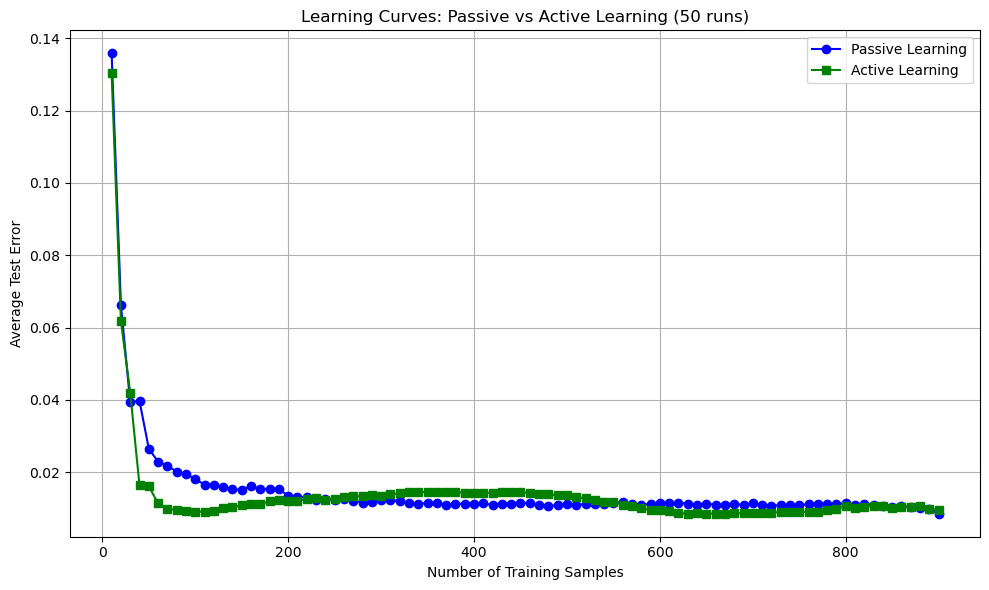

In [257]:
passive_df = pd.DataFrame(passive_test_errors).T
active_df = pd.DataFrame(active_test_errors).T
avg_passive_test_error = passive_df.mean(axis=1).to_numpy()
avg_active_test_error = active_df.mean(axis=1).to_numpy()
x = [10 * i for i in range(1, 91)]
plt.figure(figsize=(10, 6))
plt.plot(x, avg_passive_test_error, label='Passive Learning', color='blue', marker='o')
plt.plot(x, avg_active_test_error, label='Active Learning', color='green', marker='s')
plt.xlabel('Number of Training Samples')
plt.ylabel('Average Test Error')
plt.title('Learning Curves: Passive vs Active Learning (50 runs)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Active learning outperforms when the number of training samples are smaller. As the number of training sample increase performs reach the same level